# Tellaporte Proof of Concept 
### Developed by Pete Petersen and Dakota Braxton
### March 27, 2022
                

## Overview - What is Telaporte?

Tellaporte is a financial wellness application for the community of Nurses. We have chosen Nurses because they are a brilliant and dedicated group of people that give selflessly of themselves almost every day. Because nurses care more for others than themselves and are continuously challenged with life and death every day, they often neglect their health and the health of their retirement. In a nurse's mind, money does not matter relative to the demands of their job and the needs of their patients. With this in mind, we wrote Tellaporte to aid the nurses in financial wellness by simply building an application that speaks the language of nurses so that they can easily understand and correlate their financial wellness in the terminology they already know. Nurses are there for our wellness. Now Tellaporte is there for their financial wellness.

Because we wish to keep the application as inexpensive as possible, the following notebook explores some sample API data which will be helpful to our application. Most people invest in comingled funds like Mutual Funds, ETFs, or similar assets. Therefore, the starting part of the application will be a constituent breakdown of some ETFs. The final version of Tellaporte will deliver the application in a responsive form, and all the data will be linked and referenced to the main holding breakdown.

We forecast that Tellaporte will be developed in three distinct phases and released as each phase is completed. Phase one is simple analytics and benchmarking. Phase II will build some AI/ML and make a recommender system to create complements and substitutes. Finally, phase III will be the completion of the ecosystem.

One of the problems with investors today is that they do not understand how different market risks and economic regimes influences the portfolio at a constituent level. So the first phase of Tellaporte will be to develop X-RAY.

## Telaporte widget - X-Ray (freemium)

**X-Ray** is the simplest of our tools.  X-Ray allow for visibility inside comingled funds.  X-Ray will simply highlight wether or not there is duplicate exposures within the portfolio.  We will calculate some simple statistics **(Labs)** on the portfolio and use that as the **baseline** future analysis.  Further, Tellporte will then analyze these statitics and compare them with the community.  This assist the nurses in understanding their portfolio in the context of the **reference range** of the community.  This will allow the nurse to intuitively understand where their portfolio is healthy and where it is not.

All code that follows is the exploratory analysys if the data required for **X-RAY**

In [1]:
# import the required libraries

import quandl
import logging
from pathlib import Path
import zipfile
import pandas as pd
import os.path
from dotenv import load_dotenv


# Set the logging levels for Quandl

quandl_log = logging.getLogger("quandl")
quandl_log.setLevel(logging.DEBUG)

# Working with financial data so set column a float defaults for Pandas
pd.set_option('display.max_columns', None) 
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Load the environment variables from the .env file
# by calling the load_dotenv function

load_dotenv()
nasdaq_api_key = os.getenv("NASDAQ_KEY")
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


In [3]:
# Get the key from the envirionment abd wrire to Quandl specific location
# so we do not have to submit the key for each API call

quandl.save_key(nasdaq_api_key)
quandl.read_key()


In [4]:
# Use the Quandle export table method to get a big table into a zipfile
# the unzip to get the csv.  Read the csv into a data frame then set the index
# and then save the paruet file so the user does noit need to get the datagain of
# the parquet file exists

if os.path.exists('data/mer'):
    mer_df = pd.read_parquet('data/mer')
else:
    data = quandl.export_table('MER/F1', filename='mer.zip')
    zipdata = zipfile.ZipFile('data/mer.zip')
    zipinfos = zipdata.infolist()

# iterate through each file
    for zipinfo in zipinfos:
        zipinfo.filename = 'data/merdata.csv'
        zipdata.extract(zipinfo)
        
    mer_df = pd.read_csv('data/merdata.csv')
    mer_df.set_index('reportdate').to_parquet('data/mer', compression='gzip')
    mer_df = pd.read_parquet('data/mer')

In [5]:
# For each dataset use the Quandle get table method to get a big table into a zipfile
# the unzip to get the csv.  Read the csv into a data frame then set the index
# and then save the paruet file so the user does noit need to get the datagain of
# the parquet file exists


if os.path.exists('data/etf_const'):
    etf_const_df = pd.read_parquet('data/etf_const')
else:
    etf_const_df = quandl.get_table("ETFG/CONST", paginate=True) 
    etf_const_df.set_index('as_of_date').to_parquet(Path('data/etf_const'), compression='gzip')

    
if os.path.exists('data/financial_ind'):
    financial_ind_df = pd.read_parquet('data/financial_ind')
else:
    financial_ind_df = quandl.get_table('MER/F1', compnumber="39102", paginate=True)
    financial_ind_df.set_index('reportdate').to_parquet(Path('data/financial_ind'), compression='gzip')
    
    
if os.path.exists('data/prices'):
    prices_df =  pd.read_parquet('data/prices')
else:
    prices_df = quandl.get(['WIKI/IBM.11','WIKI/TSLA.11','WIKI/DOW.11' ])
    prices_df.to_parquet(Path('data/prices'), compression='gzip')
    
    
if os.path.exists('data/zacks'):
    zacks_df = pd.read_parquet('data/zacks')   
else:
    zacks_df = quandl.get_table('ZACKS/FC', paginate=True, ticker=['IBM', 'AAPL'], per_end_date={'gte': '2015-01-01'})
    zacks_df.set_index('per_end_date').to_parquet(Path('data/zacks'), compression='gzip')
    
    
if os.path.exists('data/zacks'):
    tech_ind_df = pd.read_parquet('data/tech_ind')   
else:
    tech_ind_df = quandl.get_table('NDW/EQTA', paginate=True)
    tech_ind_df.set_index('date').to_parquet(Path('data/tech_ind'), compression='gzip')

## Lets explore each dataset

#### First we will explore the MER dataset to see whats in it

In [6]:
display (mer_df.head())

,compnumber,reportid,mapcode,amount,reporttype,auditorstatus,currency,consolidated,longname,shortname,status,countrycode,region,cik,mic,ticker,exchange,address1,address2,address3,address4,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
reportdate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-12-31,372,1504051200,-9087,"4,865.64",A,N,USD,True,American International Group Inc,American International Group Inc,Active,USA,North America,5272,5.2.1,AIG,NYS,1271 Avenue of the Americas,None,None,NaN,New York,NY,USA,10020,212 770-7000,None,www.aig.com,2021-12-31,Total Assets Per Share,Balance Sheet
2010-12-31,372,1504051200,-9085,0.11,A,N,USD,True,American International Group Inc,American International Group Inc,Active,USA,North America,5272,5.2.1,AIG,NYS,1271 Avenue of the Americas,None,None,NaN,New York,NY,USA,10020,212 770-7000,None,www.aig.com,2021-12-31,Revenue to Assets,Derived
2010-12-31,372,1504051200,-8396,"106,461,000,000.00",A,N,USD,True,American International Group Inc,American International Group Inc,Active,USA,North America,5272,5.2.1,AIG,NYS,1271 Avenue of the Americas,None,None,NaN,New York,NY,USA,10020,212 770-7000,None,www.aig.com,2021-12-31,Long Term Debt,Balance Sheet
2010-12-31,372,1504051200,-7562,120.39,A,N,USD,True,American International Group Inc,American International Group Inc,Active,USA,North America,5272,5.2.1,AIG,NYS,1271 Avenue of the Americas,None,None,NaN,New York,NY,USA,10020,212 770-7000,None,www.aig.com,2021-12-31,Cash Flow Per Share,Cash Flow
2010-12-31,372,1504051200,-6159,1.25,A,N,USD,True,American International Group Inc,American International Group Inc,Active,USA,North America,5272,5.2.1,AIG,NYS,1271 Avenue of the Americas,None,None,NaN,New York,NY,USA,10020,212 770-7000,None,www.aig.com,2021-12-31,Total Debt to Equity,Derived


## We see that the dataset is very wide and not all of it is useful to our application.  So we need to isolate the useful columns.

After isolating the columns it becomes easier to see that the MER data is a bunch analytics that help us understand the **health** of a company.  We will use some of these numbers in our **lab report** and compare them in several dimensions.  For example, country, sectors, stock level, aggregated exposure accros funds.  When comparing to those values across the Telleporte community, we will be able to easily identify outliers and highlight them for the nurse.

In [7]:

display (mer_df[['compnumber','ticker','statement','indicator', 'amount']].head())

,compnumber,ticker,statement,indicator,amount
reportdate,,,,,
2010-12-31,372,AIG,Balance Sheet,Total Assets Per Share,"4,865.64"
2010-12-31,372,AIG,Derived,Revenue to Assets,0.11
2010-12-31,372,AIG,Balance Sheet,Long Term Debt,"106,461,000,000.00"
2010-12-31,372,AIG,Cash Flow,Cash Flow Per Share,120.39
2010-12-31,372,AIG,Derived,Total Debt to Equity,1.25


##  OK, now lets look at he ETF construction file.  We see that it comprized of the shares and weights of each stock in the ETF.

In [8]:
display(etf_const_df.head(3))

,etfg_date,composite_ticker,constituent_ticker,constituent_name,weight,market_value,figi,country_of_exchange,exchange,shares_held,asset_class,security_type,currency_traded
as_of_date,,,,,,,,,,,,,
2017-04-04,2017-04-04,EEM,005930,Samsung Electronics Co. Ltd.,0.04,"1,241,176,228.16",BBG000BCY2S8,KR,KOREA EXCHANGE (STOCK MARKET),"661,882.00",Equity,Common Stock,KRW
2017-04-04,2017-04-04,EEM,700,TENCENT,0.04,"1,107,548,489.88",BBG000BJ35F4,HK,HONG KONG EXCHANGES AND CLEARING LTD,"38,217,800.00",Equity,Common Stock,HKD
2017-04-04,2017-04-04,EEM,2330,TAIWAN SEMICONDUCTOR MANUFAC,0.03,"1,031,584,642.00",BBG000BN2HR7,TW,TAIPEI EXCHANGE,"165,613,000.00",Equity,Common Stock,TWD


## Again there are many columns that we do not need do lets just grab the important ones!

In [9]:
display(etf_const_df[['composite_ticker', 'constituent_ticker', 'figi','constituent_name', 'weight']].head(5))

,composite_ticker,constituent_ticker,figi,constituent_name,weight
as_of_date,,,,,
2017-04-04,EEM,005930,BBG000BCY2S8,Samsung Electronics Co. Ltd.,0.04
2017-04-04,EEM,700,BBG000BJ35F4,TENCENT,0.04
2017-04-04,EEM,2330,BBG000BN2HR7,TAIWAN SEMICONDUCTOR MANUFAC,0.03
2017-04-04,EEM,BABA,BBG006G2JVL2,ALIBABA GROUP HOLDING-SP ADR,0.03
2017-04-04,EEM,NPN,BBG000CTYB00,NASPERS LTD-N SHS,0.02


## How many ETF's did we get in the sample data and how many stocks does each one hold

We see that we got 3 common ETF's (EFA, EEM, SPY) each with alot of holdings

In [10]:

display(etf_const_df['composite_ticker'].value_counts())

EFA    953
EEM    867
SPY    506
Name: composite_ticker, dtype: int64

## Now lets take a look at one ETF, We will use SPY


In [11]:
# Generate a new dataframe for SPY for cionvenience

spy = etf_const_df[etf_const_df['composite_ticker'] == 'SPY']
total_spy_wgt = round(spy['weight'].sum(),0) * 100

In [12]:
print(f'The total weight of all the constituents for the SPY is {total_spy_wgt}%')

The total weight of all the constituents for the SPY is 100.0%


## Good news!  it looks like our sample data is complete on this ETF since we have 100% of the constituents

## Now lets take a look at the top 5 holdings for SPY

No Suprises, Apple, Microsoft, Amazon, Exxon, and J&J.  Those seem pretty safe.  Based on the financial indicators...no red flags!!

In [13]:
# Slice the top 5 holding from the SPY ETF

spy.sort_values('weight', ascending=False)[0:5]

,etfg_date,composite_ticker,constituent_ticker,constituent_name,weight,market_value,figi,country_of_exchange,exchange,shares_held,asset_class,security_type,currency_traded
as_of_date,,,,,,,,,,,,,
2017-04-04,2017-04-04,SPY,AAPL,APPLE INC,0.04,"8,819,905,228.90",BBG000B9XRY4,US,NASDAQ/NGS (GLOBAL SELECT MARKET),"60,923,570.00",Equity,Common Stock,USD
2017-04-04,2017-04-04,SPY,MSFT,MICROSOFT CORP,0.03,"5,899,113,363.15",BBG000BPH459,US,NASDAQ/NGS (GLOBAL SELECT MARKET),"89,747,655.00",Equity,Common Stock,USD
2017-04-04,2017-04-04,SPY,AMZN,AMAZON.COM INC,0.02,"4,171,746,272.46",BBG000BVPV84,US,NASDAQ/NGS (GLOBAL SELECT MARKET),"4,600,362.00",Equity,Common Stock,USD
2017-04-04,2017-04-04,SPY,XOM,EXXON MOBIL CORP,0.02,"3,967,125,109.09",BBG000GZQ728,US,"NEW YORK STOCK EXCHANGE, INC.","48,162,257.00",Equity,Common Stock,USD
2017-04-04,2017-04-04,SPY,JNJ,JOHNSON & JOHNSON,0.02,"3,928,551,221.64",BBG000BMHYD1,US,"NEW YORK STOCK EXCHANGE, INC.","31,509,073.00",Equity,Common Stock,USD


## X-Ray found an International ETF

We see that one of the ETF holds 1000 international stocks.  Lets take a quick look at distribution of stocks by country.  Why are there some many stocks in Japan.  Does Japan present any additional risks that we should think about?

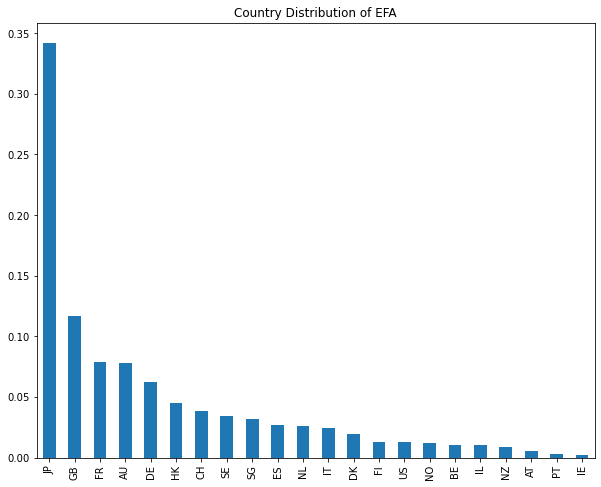

In [25]:
# create a new dataframe for the EFA etf
# Group and count the distinct holdings

efa = etf_const_df[etf_const_df['composite_ticker'] == 'EFA']
efa['country_of_exchange'].value_counts(normalize=True).plot.bar(figsize = (10,8), title = 'Country Distribution of EFA');

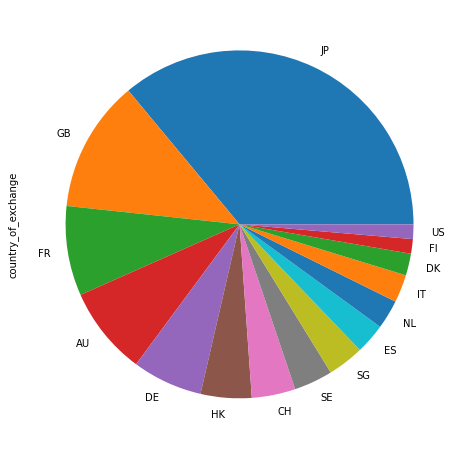

In [15]:
# Pie chart as above just cause they look great!

efa['country_of_exchange'].value_counts(normalize=True)[0:15].plot.pie(figsize=(8,8));

## Holdings weight analysis.

In the above charts we looked at the number of holding in each country. But the number of holdings is not the whole story,  It also matters what percentage is invested in each country.  Below we look at country weight and notice the Great Britain and Japan seem a little more similar now.  Almost half of those ETFs is invested in just these two countries.  

When we notice this type of concentration in Tellaporte, we might make reccomendation to hedge some of the risk.  We might also display very specific summarized news dealing with the econmics of the top countries.  For example:


### 1 Japan Economic Growth
* Economic growth should accelerate in 2022 from last year’s mild rebound, driven by higher spending on the back of a release of pent-up consumer demand and improving capital spending. However, elevated daily Covid-19 cases and the potential for more stringent restrictions remain key downside risks to the outlook. FocusEconomics panelists see the economy expanding 2.8% in 2022, which is unchanged from last month’s forecast, and 1.6% in 2023.*

### 2 United Kingdom Economic Forecast Summary (December 2021)

* The economy is recovering and expected to reach pre-crisis levels at the beginning of 2022. Output is projected to rise by 6.9% in 2021, with growth moderating to 4.7% in 2022 and 2.1% in 2023. Consumption is the main driver of growth during the projection period. Business investment will improve but continues to be held back by uncertainty. Increased border costs following the exit from the EU Single Market are weighing on imports and exports. Unemployment will continue to decline. Inflation will keep increasing due to higher energy and commodity prices and continuing supply shortages. It is expected to peak at 4.9% in the first half of 2022 and then fall back towards the 2% target by the end of 2023.


### After reading the economic growth forcasts, maybe over allocating to these countries is not such a bad idea

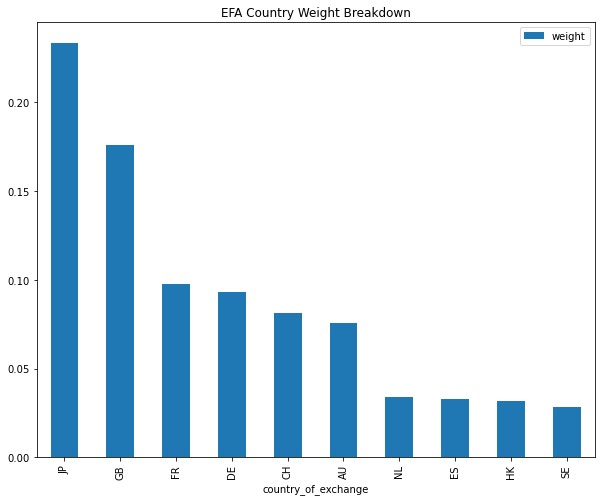

In [30]:
# Create the total weight of the consituents within each country and diplat them sorted
# descending

efa_sum_by_exchange = efa.groupby(['country_of_exchange'])['weight'].sum().reset_index()

efa_sum_by_exchange.sort_values('weight', ascending=False,)[0:10].plot.bar(figsize=(10,8), 
                    y = 'weight', x = 'country_of_exchange',
                    title = 'EFA Country Weight Breakdown');



## Now we can take a look at some other data that we have.

Looks like we were able to get some prices for some stocks.  Perhaps we can draw some conclusion by looking at longer term ternds.

In [17]:
prices_df['WIKI/IBM - Adj. Close'].head(5)

Date
1962-01-02   15.10
1962-01-03   15.23
1962-01-04   15.08
1962-01-05   14.78
1962-01-08   14.51
Name: WIKI/IBM - Adj. Close, dtype: float64

## Technical Price Analysys

IBM looks like Tesla from this very long term veiw. Wow, IBM has pricing data from 1960 to 2020. And 2020 is looking alot like 2010.  Don't give up on this workhorse!! It can provide some much needed stability during times of turbulence even though its a technogogy company.

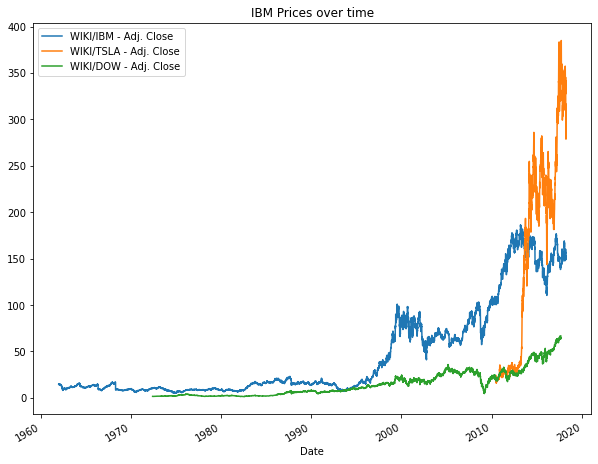

In [35]:
# Create a long term price chart

prices_df['WIKI/IBM - Adj. Close'].plot(figsize = (10,8), title = 'IBM Prices over time');



## Looks like the technichal indicators has a lot of useful colums for the app.

We can use these indicators to advise on when oppurtune moments to buy or sell the ETF if X-RAY determines that your portfolio may be better optimized for a risk adjusted return with a different allocation of your existing ETFs.

In [19]:
tech_ind_df.symbol.unique()
tech_ind_df[tech_ind_df['symbol'] == 'AA']

,symbol,import_region,country,exchange_code,company_name,50_day_ma,150_day_ma,200_day_ma,daily_dist_high,daily_dist_med,daily_dist_low,daily_obos,weekly_dist_high,weekly_dist_med,weekly_dist_low,weekly_obos,pfchart_signal,pfchart_signal_date,pfchart_column,pfchart_column_date,rschart_signal,rschart_signal_date,rschart_column,rschart_column_date,prschart_signal,prschart_signal_date,prschart_column,prschart_column_date,pfchart_trend,pfchart_trend_date,pfchart_pattern,pfchart_pattern_date,tech_attrib,daily_mom,daily_mom_calc,daily_mom_num_days,daily_mom_cross,daily_mom_change,daily_mom_change_date,weekly_mom,weekly_mom_calc,weekly_mom_num_weeks,weekly_mom_cross,weekly_mom_change,weekly_mom_change_date,monthly_mom,monthly_mom_calc,monthly_mom_num_months,monthly_mom_cross,monthly_mom_change,monthly_mom_change_date,auto_generated_comment
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-03-25,AA,US1,United States,XNYS,Alcoa Inc.,73.10,57.74,52.72,96.29,84.45,72.62,63.44,104.02,75.15,46.27,58.23,B,2022-03-21,X,2022-03-25,B,2020-05-27,X,2021-12-21,B,2021-03-25,X,2021-02-24,P,2021-12-09,1,2022-03-25,5,1,0.05,6,79.75,-0.04,2022-03-18,0.00,-0.02,2.00,96.42,-0.01,2022-03-18,1.00,0.18,2.00,63.31,0.16,2022-02-28,[AA] Alcoa Inc. (95.06) - This is a strong s...
2022-03-24,AA,US1,United States,XNYS,Alcoa Inc.,72.50,57.38,52.45,93.85,82.98,72.11,111.10,99.01,72.02,45.02,85.37,B,2022-03-21,O,2022-03-24,B,2020-05-27,X,2021-12-21,B,2021-03-25,X,2021-02-24,P,2021-12-09,16,2022-03-23,5,1,0.09,5,73.60,-0.03,2022-03-18,0.00,-0.01,2.00,96.42,0.00,2022-03-18,1.00,0.20,2.00,63.31,0.18,2022-02-28,[AA] Alcoa Inc. (94.22) - This is a strong s...
2022-03-23,AA,US1,United States,XNYS,Alcoa Inc.,71.84,56.99,52.17,93.19,81.80,70.42,109.08,99.01,72.02,45.02,82.26,B,2022-03-21,X,2022-03-23,B,2020-05-27,X,2021-12-21,B,2021-03-25,X,2021-02-24,P,2021-12-09,16,2022-03-23,5,1,0.12,4,67.03,0.01,2022-03-18,0.00,-0.01,2.00,96.42,-0.00,2022-03-18,1.00,0.20,2.00,63.31,0.18,2022-02-28,[AA] Alcoa Inc. (89.88) - This is a strong s...
2022-03-22,AA,US1,United States,XNYS,Alcoa Inc.,71.19,56.64,51.89,91.49,80.34,69.20,85.56,99.01,72.02,45.02,66.18,B,2022-03-21,O,2022-03-22,B,2020-05-27,X,2021-12-21,B,2021-03-25,X,2021-02-24,P,2021-12-09,1,2022-03-21,5,1,0.11,3,65.07,0.02,2022-03-18,0.00,-0.03,2.00,96.42,-0.02,2022-03-18,1.00,0.17,2.00,63.31,0.15,2022-02-28,[AA] Alcoa Inc. (90.69) - This is a strong s...
2022-03-21,AA,US1,United States,XNYS,Alcoa Inc.,70.64,56.32,51.63,91.92,79.57,67.23,90.07,99.01,72.02,45.02,69.18,B,2022-03-21,X,2022-03-16,B,2020-05-27,X,2021-12-21,B,2021-03-25,X,2021-02-24,P,2021-12-09,1,2022-03-21,5,1,0.09,2,70.41,0.07,2022-03-18,0.00,-0.02,2.00,96.42,-0.02,2022-03-18,1.00,0.18,2.00,63.31,0.15,2022-02-28,[AA] Alcoa Inc. (82.44) - This is a strong s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,AA,US1,United States,XNYS,Alcoa Inc.,25.70,20.08,18.32,35.83,31.10,26.38,23.88,35.99,26.61,17.23,59.94,B,2020-04-09,X,2021-03-26,B,2020-05-27,X,2021-02-22,B,2021-03-25,X,2021-02-24,P,2020-11-09,1,2021-03-31,5,1,0.05,5,28.20,-0.02,2021-03-26,1.00,0.09,6.00,25.71,-0.07,2021-02-26,1.00,0.32,10.00,15.84,-0.35,2020-07-31,[AA] Alcoa Inc. (32.49) - This is a strong st...
2021-03-31,AA,US1,United States,XNYS,Alcoa Inc.,25.51,19.97,18.21,36.22,31.13,26.05,26.69,35.49,25.59,15.69,69.70,B,2020-04-09,X,2021-03-26,B,2020-05-27,X,2021-02-22,B,2021-03-25,X,2021-02-24,P,2020-11-09,1,2021-03-31,5,1,0.07,4,26.62,-0.00,2021-03-26,1.00,0.09,6.00,25.71,-0.06,2021-02-26,1.00,0.67,9.00,8.01,0.20,2020-07-31,[AA] Alcoa Inc. (32.97) - This is a strong st...
2021-03-30,AA,US1,United States,XNYS,Alcoa Inc.,25.32,19.85,18.11,35.88,30.90,25.92,41.53,35.49,25.59,15.69,74.55,B,2020-04-09,X,2021-03-26,B,2020-05-27,X,2021-02-22,B,2021-03-25,X,2021-02-24,P,2020-11-09,1,2021-03-10,5,1,0.07,3,26.67,0.05,2021-03-26,1.

# For Example...Momentum

Momentum measures the velocity of price changes as opposed to the actual price levels themselves. Momentum is measured by continually taking price differences for a fixed time period. To create a 10 day period momentum line you would subtract the closing price from 10 days ago from the last closing price. This result is then plotted around a zero line. A momentum value above zero indicates that prices are moving up, and below zero indicates moving down.Here is the detail calculation for the Momentum Indicator: M = (CP / CPn) * 100 Here, M = Momentum, CP = Closing Price, n = close price n bars ago.

In this case the momentum for Alcoa is improving which may signal that investors are favoring value stocks.  Might be time to look for ETF's that are concentrated in Value.  Accoring to investopedia:

**Value investing is an investment strategy that involves picking stocks that appear to be trading for less than their intrinsic or book value. Value investors actively ferret out stocks they think the stock market is underestimating. They believe the market overreacts to good and bad news, resulting in stock price movements that do not correspond to a company's long-term fundamentals. The overreaction offers an opportunity to profit by buying stocks at discounted prices—on sale.**

**Warren Buffett is probably the best-known value investor today, but there are many others, including Benjamin Graham (Buffett's professor and mentor), David Dodd, Charlie Munger, Christopher Browne (another Graham student), and billionaire hedge-fund manager, Seth Klarman.**

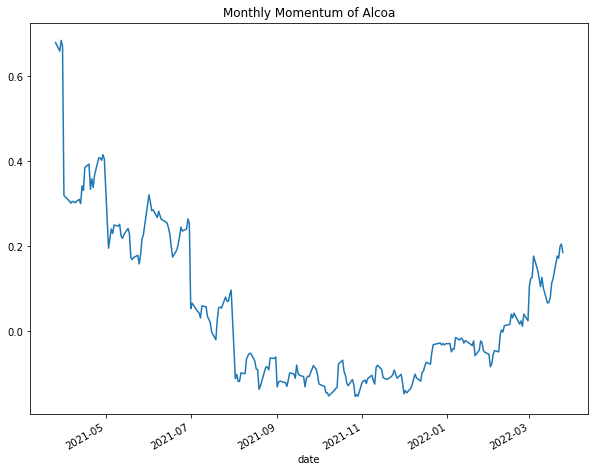

In [20]:
tech_ind_df['monthly_mom_calc'][tech_ind_df['symbol'] == 'AA'].plot.line(figsize = (10,8), title =  'Monthly Momentum of Alcoa');

## Zacks Data

We also have the financial statement data from Zacks.  We can use this to create ratios that are useful for explaining any over or underperformance relative to peer constituents.  Similarly, we can look at any individual item over time to see how it changing.

In [21]:

zacks_df[zacks_df['m_ticker'] == 'IBM']

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_type,per_code,per_fisc_year,per_fisc_qtr,per_cal_year,per_cal_qtr,data_type_ind,filing_type,qtr_nbr,zacks_sector_code,zacks_x_ind_code,zacks_metrics_ind_code,fye_month,comp_cik,per_len,sic_code,filing_date,last_changed_date,state_incorp_name,bus_address_line_1,bus_city,bus_state_name,bus_post_code,bus_phone_nbr,bus_fax_nbr,mail_address_line_1,mail_city,mail_state_name,mail_post_code,country_name,country_code,home_exchange_name,emp_cnt,emp_pt_cnt,emp_ft_cnt,emp_other_cnt,comm_share_holder,auditor,auditor_opinion,comp_url,email_addr,nbr_shares_out,shares_out_date,officer_name_1,officer_title_1,officer_name_2,officer_title_2,officer_name_3,officer_title_3,officer_name_4,officer_title_4,officer_name_5,officer_title_5,rpt_0_date,tot_revnu,cost_good_sold,gross_profit,tot_deprec_amort,int_exp_oper,int_invst_income_oper,res_dev_exp,in_proc_res_dev_exp_aggr,tot_sell_gen_admin_exp,rental_exp_ind_broker,pension_post_retire_exp,other_oper_income_exp,tot_oper_exp,oper_income,non_oper_int_exp,int_cap,asset_wdown_impair_aggr,restruct_charge,merger_acq_income_aggr,rental_income,spcl_unusual_charge,impair_goodwill,litig_aggr,gain_loss_sale_asset_aggr,gain_loss_sale_invst_aggr,stock_div_subsid,income_loss_equity_invst_other,pre_tax_minority_int,int_invst_income,other_non_oper_income_exp,tot_non_oper_income_exp,pre_tax_income,tot_provsn_income_tax,income_aft_tax,minority_int,equity_earn_subsid,invst_gain_loss_other,other_income,income_cont_oper,income_discont_oper,income_bef_exord_acct_change,exord_income_loss,cumul_eff_acct_change,consol_net_income_loss,non_ctl_int,net_income_parent_comp,pref_stock_div_other_adj,net_income_loss_share_holder,eps_basic_cont_oper,eps_basic_discont_oper,eps_basic_acct_change,eps_basic_extra,eps_basic_consol,eps_basic_parent_comp,basic_net_eps,eps_diluted_cont_oper,eps_diluted_discont_oper,eps_diluted_acct_change,eps_diluted_extra,eps_diluted_consol,eps_diluted_parent_comp,diluted_net_eps,dilution_factor,avg_d_shares,avg_b_shares,norm_pre_tax_income,norm_aft_tax_income,ebitda,ebit,rpt_1_date,cash_sterm_invst,note_loan_rcv,rcv_est_doubt,rcv_tot,invty,prepaid_expense,def_charge_curr,def_tax_asset_curr,asset_discont_oper_curr,other_curr_asset,tot_curr_asset,gross_prop_plant_equip,tot_accum_deprec,net_prop_plant_equip,net_real_estate_misc_prop,cap_software,lterm_invst,adv_dep,lterm_rcv,invty_lterm,goodwill_intang_asset_tot,def_charge_non_curr,def_tax_asset_lterm,asset_discont_oper_lterm,pension_post_retire_asset,other_lterm_asset,tot_lterm_asset,tot_asset,note_pay,acct_pay,div_pay,other_pay,accrued_exp,other_accrued_exp,curr_portion_debt,curr_portion_cap_lease,curr_portion_tax_pay,defer_revnu_curr,defer_tax_liab_curr,liab_discont_oper_curr,other_curr_liab,tot_curr_liab,tot_lterm_debt,defer_revnu_non_curr,pension_post_retire_liab,defer_tax_liab_lterm,mand_redeem_pref_sec_subsid,pref_stock_liab,min_int,liab_disc_oper_lterm,other_non_curr_liab,tot_lterm_liab,tot_liab,tot_pref_stock,comm_stock_net,addtl_paid_in_cap,retain_earn_accum_deficit,equity_equiv,treas_stock,compr_income,def_compsn,other_share_holder_equity,tot_comm_equity,tot_share_holder_equity,tot_liab_share_holder_equity,comm_shares_out,pref_stock_shares_out,tang_stock_holder_equity,rpt_2_date,net_income_loss,tot_deprec_amort_cash_flow,other_non_cash_item,tot_non_cash_item,change_acct_rcv,change_invty,change_acct_pay,change_acct_pay_accrued_liab,change_income_tax,change_asset_liab,tot_change_asset_liab,oper_activity_other,cash_flow_oper_activity,net_change_prop_plant_equip,net_change_intang_asset,net_acq_divst,net_change_sterm_invst,net_change_lterm_invst,net_change_invst_tot,invst_activity_other,cash_flow_invst_activity,net_lterm_debt,net_curr_debt,debt_issue_retire_net_tot,net_comm_equity_issued_repurch,net_pref_equity_issued_repurch,net_tot_equity_issued_repurch,tot_comm_pref_stock_div_paid,fin_activity_other,cash_flow_fin_activity,fgn_exchange_rate_adj,disc_oper_misc_cash_flow_adj,incr_decr_cas

In [22]:
# Get the financial for IBM

ibm = zacks_df[zacks_df['m_ticker'] == 'IBM']

In [31]:
# There ate multiple report periods, so we slice just the quarterlies for comparison.

ibm_q = ibm[ibm['per_type'] == 'Q']

## Top Holding - IBM

Based on Zacks data We see that revenues and expenses go down in Q3 for IBM and this seem like a preictable trend.  We think that buying some more exposure to IBM make make sense after their earnings call because the stock price us likely to go down. **Caution:** it looks like the GAP between cost of goods and margin is narrowing in the 4th quarter.  This could be steep discounts to get rid of inventory for year end leaving them without inventory for the 1st quarter of next year.

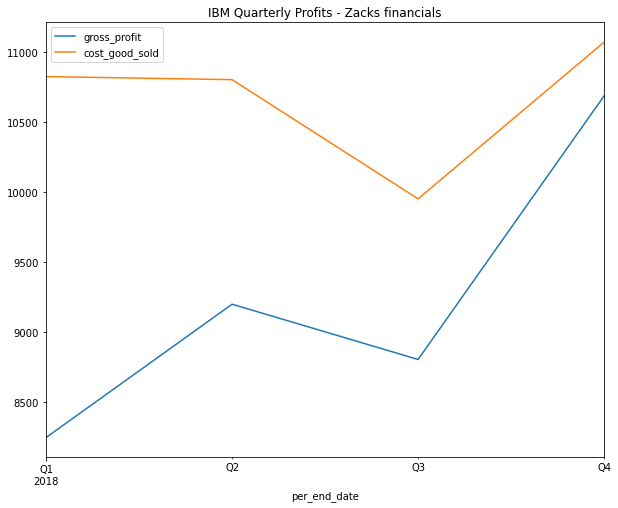

In [33]:
# Generate a line chart showing profit vs COG

ibm_q[['gross_profit', 'cost_good_sold']].plot(figsize = (10,8), title = 'IBM Quarterly Profits - Zacks financials');

## Conclusion

We find that many vital data help explain the health of a portfolio, and the analytics are also straightforward to build. There is nothing new here. But, by using our dialects to interpret financial data for health care professionals, we can generate trust, understanding, and community in an underserved population. AND... this population, on average, invests 30 Billion per year with a 5% CAGR that is likely to continue for decades.

During our market research focus groups, we found that almost all Nurses shared a sense that their portfolios were not healthy and they needed guidance. Each survey respondent acknowledged that Tellaporte was required in the market and that they would use the platform on day one. Nurses are brand loyal and rely on trust and process to do their job. At Tellaporte, we give them just that!